# Indice del fatturato dei servizi

Here we are trying to reproduce the graph under the section 'INDICE FATTURATO SERVIZI' at https://www.istat.it/it/congiuntura

In [1]:
from nbdev import *
from istatapi import *
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%nbdev_hide
%reload_ext autoreload
%autoreload 2

UsageError: Line magic function `%nbdev_hide` not found.


The graph we are trying to reproduce is an index on turnover in the service sector. With `istatapi` we can search through all the available datasets by simply using the following function:

In [3]:
search_dataset("index")

,df_id,version,df_description,df_structure_id
17,114_191,1.2,Industrial new orders and turnover index,DCSC_ORDFATT
19,115_333,1.2,Industrial production index,DCSC_INDXPRODIND_1
20,115_362,1.2,Index of production in construction,DCSC_INDXPRODCOSTR_1
25,119_367,1.3,Indexes of turnover in other services,DCSC_FATTSERVIZ_1
26,120_337,1.3,Index of retail trade sales,DCSC_COMMDET_1
49,143_222,1.0,Import price index - monthly data,DCSC_PREIMPIND


To retrieve data from a specific dataset, we first need to create an instance of the DataSet class. We can use `df_id`, `df_description` or `df_structure_id` from the above DataFrame. This may take a few seconds to load.

In [4]:
# initialize the dataset and get its dimensions
ds = DataSet(dataflow_identifier="119_367")

We now want to see what variables are included in the dataset that we are analysing. With `istatapi` we can easily print its variables ("dimensions" in ISTAT terminology) and their description.

In [5]:
ds.dimensions_info()

,dimension,dimension_ID,description
0,FREQ,CL_FREQ,Frequency
1,ATECO_2007,CL_ATECO_2007,Nace 2007
2,ADJUSTMENT,CL_CORREZ,Adjustment
3,ITTER107,CL_ITTER107,Territory
4,TIPO_DATO,CL_TIPO_DATO7,Data type 7


Now, each dimension can have a few possible values. `istatapi` provides a quick method to analyze these values and print their English descriptions. 

In [6]:
dimension = "TIPO_DATO"
ds.get_dimension_values(dimension)

,values_ids,values_description
0,SERV_TURN_2,indexes of turnover in other services - base 2...
1,SERV_TURN_1,indexes of turnover in other services - base 2...
2,SERV_TURN,indexes of turnover in other services - base 2...


If we do not filter any of our variables, the data will just include all the possible values in the dataset. This could result in too much data that would slow our code and make it difficult to analyze. Thus, we need to filter our dataset. To do so, we can simply use the `values_ids` that we found using the function `get_dimension_values` in the cell above.

**Note**: Make sure to pass the names of the dimensions in lower case letters as arguments of the `set_filter` function. If you want to filter for multiple values, simply pass them as lists.

In [7]:
ateco_2007 = ["0014", "J"] #TOTAL AND ITC services 
tipo_dato = "SERV_TURN_2" #type of data
adjustment = "Y" #seasonally adjusted data

ds.set_filters(ateco_2007=ateco_2007, tipo_dato=tipo_dato, adjustment=adjustment)

Having set our filters, we can now finally retrieve the data by simply passing our DataSet instance to the function get_data. It will return a pandas DataFrame with all the data that we requested. The data will be already sorted by datetime

In [8]:
service_df = get_data(ds)
service_df.head()

/Users/jacopo/Desktop/projects/istatapi/istatapi/retrieval.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["TIME_PERIOD"] = pd.to_datetime(


,DATAFLOW,FREQ,ATECO_2007,ADJUSTMENT,ITTER107,TIPO_DATO,TIME_PERIOD,OBS_VALUE,BREAK,CONF_STATUS,OBS_PRE_BREAK,OBS_STATUS,BASE_PER,UNIT_MEAS,UNIT_MULT,METADATA_EN,METADATA_IT
90,IT1:119_367(1.3),Q,J,Y,IT,SERV_TURN_2,2000-01-01,100.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,IT1:119_367(1.3),Q,J,Y,IT,SERV_TURN_2,2000-04-01,99.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,IT1:119_367(1.3),Q,J,Y,IT,SERV_TURN_2,2000-07-01,100.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,IT1:119_367(1.3),Q,J,Y,IT,SERV_TURN_2,2000-10-01,102.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,IT1:119_367(1.3),Q,J,Y,IT,SERV_TURN_2,2001-01-01,101.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


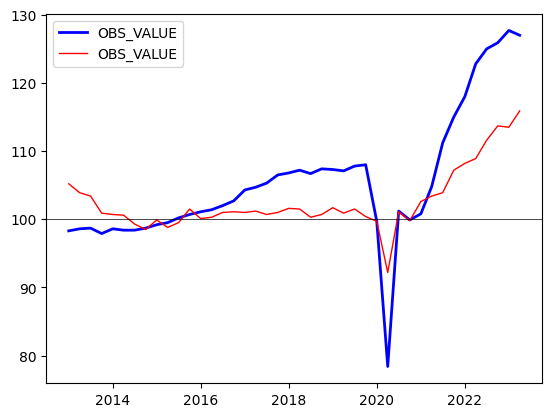

In [9]:
# Plot the data
is_0014 = service_df["ATECO_2007"] == "0014"
is_J = service_df["ATECO_2007"] == "J"
after_2013 = service_df["TIME_PERIOD"] >= "2013"


plt.plot(
    "TIME_PERIOD",
    "OBS_VALUE",
    data=service_df[is_0014 & after_2013],
    marker="",
    color="blue",
    linewidth=2,
)
plt.plot(
    "TIME_PERIOD",
    "OBS_VALUE",
    data=service_df[is_J & after_2013],
    marker="",
    color="red",
    linewidth=1,
)
plt.axhline(y=100, color="black", linewidth=0.5, linestyle="-")
plt.legend()
plt.rcParams["figure.figsize"] = (15, 4)

And That's it! With a few lines of code we were able to neatly reproduce the graph!